# Importing/exporting

In [8]:
from matador.query import DBQuery
from matador.hull import QueryConvexHull

8386 results found for query in ajm.
Creating hull from AJM db structures.

Finding the best calculation set for hull...
     possible shock     : matched 8383 structures.	-> PBE, 300.0 eV, 0.08 1/A
Matched at least 2/3 of total number, composing hull...
Composing hull from set containing possible shock
────────────────────────────────────────────────────────────
Scanning for suitable Li chemical potential...
Using difference crate as chem pot for Li
────────────────────────────────────────────────────────────
Scanning for suitable P chemical potential...
Using contributor visitor as chem pot for P
────────────────────────────────────────────────────────────
Constructing binary hull...
18 structures within 0.05 eV of the hull with chosen chemical potentials.
─────────────────────────────────────────────────────────────────────────────────────────────────────────────
           ID            !?!   Pressure   Volume/fu   Hull dist./atom  Space group  Formula    # fu   Prov.  
───────────

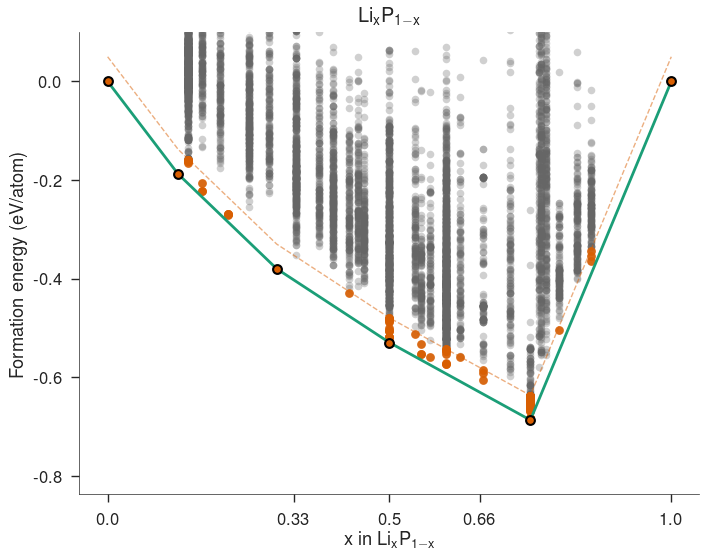

In [3]:
kwargs = {'composition': ['LiP'], 'summary': True,
          'hull_cutoff': 0.05, 'cutoff': [300, 301]}
hull = QueryConvexHull(**kwargs)

## Dump to json files

In [12]:
from json import dump, load
for doc in hull.cursor[:5]:
    source_root = [src for src in doc['source'] if src.endswith('.res') or src.endswith('.castep')][0].split('/')[-1]
    del doc['_id']
    with open(source_root + '.json', 'w') as f:
        dump(doc, f)

## Load from json files

In [16]:
from glob import glob
json_list = glob('*.json')
hull_cursor = []
for json_file in json_list:
    with open(json_file, 'r') as f:
        hull_cursor.append(load(f))

In [17]:
hull_cursor[4]

{'atom_types': ['Li',
  'Li',
  'Li',
  'Li',
  'Li',
  'Li',
  'Li',
  'Li',
  'Li',
  'Li',
  'Li',
  'Li',
  'Li',
  'Li',
  'Li',
  'Li',
  'Li',
  'Li',
  'Li',
  'Li',
  'Li',
  'Li',
  'Li',
  'Li',
  'P',
  'P',
  'P',
  'P'],
 'cell_volume': 492.396168,
 'cell_volume_per_b': 123.099042,
 'concentration': [0.8571428571428571],
 'cut_off_energy': 300.0,
 'elems': ['Li', 'P'],
 'enthalpy': -5288.26991,
 'enthalpy_per_atom': -188.8667825,
 'enthalpy_per_b': -1322.0674775,
 'external_pressure': [[0.0, 0.0, 0.0], [0.0, 0.0], [0.0]],
 'finite_basis_corr': '0',
 'formation_enthalpy_per_atom': -0.36347635714284365,
 'geom_method': 'lbfgs',
 'gravimetric_capacity': 5192.193204357712,
 'hull_distance': 0.028733928571447187,
 'kpoints_mp_spacing': 0.08,
 'lattice_abc': [[13.1112, 6.372098, 5.893723], [90.0, 90.0, 90.0]],
 'lattice_cart': [[13.1112, 0.0, 0.0],
  [0.0, 6.372098, 0.0],
  [0.0, 0.0, 5.893723]],
 'metals_method': 'dm',
 'num_atoms': 28,
 'num_fu': 4,
 'positions_frac': [[0.296